In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [8]:
df_freq = fetch_openml(data_id=41214, as_frame=True).data
df_freq["IDpol"] = df_freq["IDpol"].astype(int)
df_freq.set_index("IDpol", inplace=True)
df_freq

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
IDpol,,,,,,,,,,,
1,1.0,0.10000,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
3,1.0,0.77000,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
5,1.0,0.75000,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22
10,1.0,0.09000,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
11,1.0,0.84000,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
...,...,...,...,...,...,...,...,...,...,...,...
6114326,0.0,0.00274,E,4.0,0.0,54.0,50.0,B12,Regular,3317.0,R93
6114327,0.0,0.00274,E,4.0,0.0,41.0,95.0,B12,Regular,9850.0,R11
6114328,0.0,0.00274,D,6.0,2.0,45.0,50.0,B12,Diesel,1323.0,R82


In [9]:
df_sev = fetch_openml(data_id=41215, as_frame=True).data
df_sev["IDpol"] = df_sev["IDpol"].astype(int)
df_sev.set_index("IDpol", inplace=True)
df_sev = df_sev.groupby("IDpol").sum()
df_sev

,ClaimAmount
IDpol,
139,303.00
190,1981.84
414,1456.55
424,10834.00
463,3986.67
...,...
6113521,1324.40
6113793,1769.88
6113817,1288.28


In [41]:
df = df_freq.join(df_sev, how="left")
df["ClaimAmount"].fillna(0, inplace=True)
df["ClaimFreq"] = df["ClaimNb"] / df["Exposure"]
df

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,ClaimFreq
IDpol,,,,,,,,,,,,,
1,1.0,0.10000,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0,10.000000
3,1.0,0.77000,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0,1.298701
5,1.0,0.75000,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22,0.0,1.333333
10,1.0,0.09000,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0,11.111111
11,1.0,0.84000,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0,1.190476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114326,0.0,0.00274,E,4.0,0.0,54.0,50.0,B12,Regular,3317.0,R93,0.0,0.000000
6114327,0.0,0.00274,E,4.0,0.0,41.0,95.0,B12,Regular,9850.0,R11,0.0,0.000000
6114328,0.0,0.00274,D,6.0,2.0,45.0,50.0,B12,Diesel,1323.0,R82,0.0,0.000000


In [42]:
sev = pd.DataFrame(df['ClaimFreq'])
freq = df['ClaimNb']
X = df.drop(['ClaimAmount', 'ClaimNb','ClaimFreq'], axis=1)
X

,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
IDpol,,,,,,,,,,
1,0.10000,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
3,0.77000,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
5,0.75000,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22
10,0.09000,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
11,0.84000,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
...,...,...,...,...,...,...,...,...,...,...
6114326,0.00274,E,4.0,0.0,54.0,50.0,B12,Regular,3317.0,R93
6114327,0.00274,E,4.0,0.0,41.0,95.0,B12,Regular,9850.0,R11
6114328,0.00274,D,6.0,2.0,45.0,50.0,B12,Diesel,1323.0,R82


In [44]:
X1 = X

In [45]:
categorical_columns = X1.select_dtypes(include=['object', 'category']).columns
X1_dummy = pd.get_dummies(X1, columns=categorical_columns, prefix=categorical_columns)
X1_dummy

,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_A,Area_B,Area_C,Area_D,...,Region_R53,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94
IDpol,,,,,,,,,,,,,,,,,,,,,
1,0.10000,5.0,0.0,55.0,50.0,1217.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.77000,5.0,0.0,55.0,50.0,1217.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,0.75000,6.0,2.0,52.0,50.0,54.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0.09000,7.0,0.0,46.0,50.0,76.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
11,0.84000,7.0,0.0,46.0,50.0,76.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114326,0.00274,4.0,0.0,54.0,50.0,3317.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6114327,0.00274,4.0,0.0,41.0,95.0,9850.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6114328,0.00274,6.0,2.0,45.0,50.0,1323.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [48]:
freq
freqbin = freq.apply(lambda x: 0 if x == 0 else 1)
freq1 = pd.concat([pd.Series(freq, name='ClaimNb'), pd.Series(freqbin, name='IsClaim')], axis=1)
freq1

,ClaimNb,IsClaim
IDpol,,
1,1.0,1
3,1.0,1
5,1.0,1
10,1.0,1
11,1.0,1
...,...,...
6114326,0.0,0
6114327,0.0,0
6114328,0.0,0


In [113]:
freq_train_, freq_test, X_train, X_test = train_test_split(freq, X1_dummy, random_state=0)

In [105]:
freq_train_bin = freq_train.apply(lambda x: 0 if x == 0 else 1)

# Hurdle

## Stage 1: Binary Model (Logistic Regression)

In [106]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, freq_train_bin)
predicted_bin = model.predict(X_test)

In [114]:
X_test = X_test.reset_index()

In [122]:
pred_claim = pd.concat([X_test, pd.DataFrame(predicted_bin)],axis=1)
pred_claim.set_index('IDpol', inplace = True)
test2 = pred_claim[pred_claim[0] != 0]
X_test2 = test2.drop([0],axis=1)

In [75]:
df_y = pd.DataFrame(freq_train)
df_combined = pd.concat([X_train, df_y], axis=1)
df_claim = df_combined[df_combined['ClaimNb'] != 0]
X_claim = df_claim.drop('ClaimNb', axis=1)
Freq_claim = df_claim['ClaimNb']

In [76]:
X_claim

,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_A,Area_B,Area_C,Area_D,...,Region_R53,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94
IDpol,,,,,,,,,,,,,,,,,,,,,
2156035,0.17,7.0,12.0,36.0,100.0,242.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4118983,0.66,6.0,6.0,32.0,80.0,1332.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3207426,1.00,4.0,6.0,41.0,60.0,359.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9087,0.09,7.0,15.0,22.0,100.0,1955.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3743,0.85,5.0,0.0,47.0,50.0,27.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015012,0.42,4.0,10.0,19.0,100.0,398.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2256859,0.49,10.0,6.0,54.0,50.0,26.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24901,0.07,5.0,15.0,23.0,100.0,83.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
Freq_claim

IDpol
2156035    1
4118983    1
3207426    1
9087       1
3743       1
          ..
1015012    1
2256859    1
24901      1
4142723    1
4123343    1
Name: ClaimNb, Length: 25561, dtype: int64

## State 2: Truncated Possion Model

In [124]:
from statsmodels.discrete.truncated_model import TruncatedLFPoisson

In [127]:
import numpy as np
from scipy.stats import Truncated_poisson

ImportError: cannot import name 'Truncated_poisson' from 'scipy.stats' (/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/__init__.py)

In [125]:
tpmodel = TruncatedLFPoisson()
tpmodel.fit(Freq_claim, X_claim, truncation = 0)
predicted_claim = model.predict(X_test2)
predicted_claim 

TypeError: __init__() missing 2 required positional arguments: 'endog' and 'exog'

In [ ]:
model_truncated_poisson = sm.ZeroInflatedPoisson(endog = Freq_claim, 
                                                 exog = sm.add_constant(X_claim),
                                                 exog_infl = sm.add_constant(predicted_zero_probs),
                                                  inflation = 'logit')

result_truncated_poisson = model_truncated_poisson.fit(maxiter=1000)

In [30]:
import statsmodels.api as sm
from statsmodels.discrete.count_model import ZeroInflatedPoisson

In [21]:
model_logit = sm.Logit((freq_train > 0).astype(int), X_train)
result_logit = model_logit.fit()
print(result_logit.summary())

Optimization terminated successfully.
         Current function value: 0.193123
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                ClaimNb   No. Observations:               508509
Model:                          Logit   Df Residuals:                   508462
Method:                           MLE   Df Model:                           46
Date:                Wed, 31 Jan 2024   Pseudo R-squ.:                 0.03099
Time:                        16:49:44   Log-Likelihood:                -98205.
converged:                       True   LL-Null:                   -1.0135e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Exposure           1.1022      0.020     54.972      0.000       1.063       1.141
VehPower         

In [22]:
predicted_zero_probs = result_logit.predict(X_train)

In [23]:
model_truncated_poisson = sm.ZeroInflatedPoisson(endog = freq_train, 
                                                 exog = sm.add_constant(X_train),
                                                 exog_infl = sm.add_constant(predicted_zero_probs),
                                                  inflation = 'logit')

result_truncated_poisson = model_truncated_poisson.fit(maxiter=1000)

print(result_truncated_poisson.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1331: RuntimeWarning: overflow encountered in exp
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1508: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + offset + exposure)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1509: RuntimeWarning: invalid value encountered in multiply
  return (self.endog - L)[:,None] * X
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1074: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_m

         Current function value: 28.024676
         Iterations: 188
         Function evaluations: 291
         Gradient evaluations: 272


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/count_model.py:629: RuntimeWarning: overflow encountered in exp
  coeff = (1 + w[zero_idx] * (np.exp(mu[zero_idx]) - 1))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/count_model.py:637: RuntimeWarning: overflow encountered in exp
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/count_model.py:638: RuntimeWarning: overflow encountered in square
  coeff**2)).sum() - (mu[nonzero_idx] * self.exog[nonzero_idx, i] *
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/count_model.py:637: RuntimeWarning: invalid value encountered in true_divide
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/li

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                 ClaimNb   No. Observations:               508509
Model:             ZeroInflatedPoisson   Df Residuals:                   508461
Method:                            MLE   Df Model:                           47
Date:                 Wed, 31 Jan 2024   Pseudo R-squ.:                  -131.9
Time:                         16:51:56   Log-Likelihood:            -1.4251e+07
converged:                       False   LL-Null:                   -1.0719e+05
Covariance Type:             nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
inflate_const     -3.3497        nan        nan        nan         nan         nan
inflate_0         -7.2979        nan        nan        nan         nan         nan
const             34.5515   

In [24]:
predicted_zero_probs_test = result_logit.predict(X_test)
predicted_ClaimNb = result_truncated_poisson.predict(exog=sm.add_constant(X_test),
                                                          exog_infl=sm.add_constant(predicted_zero_probs_test))

mae = np.mean(np.abs(freq_test - predicted_ClaimNb))
rmse = math.sqrt(mean_squared_error(freq_test, predicted_ClaimNb))
print("MAE =", mae)

MAE = 1.000192143670681e+17
RMSE =  4.033305821372798e+19


In [15]:
pip show statsmodels

Name: statsmodels
Version: 0.14.1
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /opt/anaconda3/lib/python3.9/site-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [13]:
import statsmodels.discrete.truncated_model as smtc
from statsmodels.discrete.discrete_model import (
    Poisson, NegativeBinomial, NegativeBinomialP, GeneralizedPoisson)
from statsmodels.discrete.count_model import (
    ZeroInflatedPoisson,
    ZeroInflatedGeneralizedPoisson,
    ZeroInflatedNegativeBinomialP
    )
from statsmodels.discrete.truncated_model import (
    TruncatedLFPoisson,
    TruncatedLFNegativeBinomialP,
    _RCensoredPoisson,
    HurdleCountModel,
    )

In [15]:
mod_h = HurdleCountModel(freq, X1_dummy)
res_h = mod_h.fit(disp=False)
print(res_h.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/truncated_model.py:729: RuntimeWarning: divide by zero encountered in log
  np.log(1 - np.exp(llf_main[self.nonzero_idx])))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/truncated_model.py:754: RuntimeWarning: divide by zero encountered in true_divide
  (score_main[self.nonzero_idx].T *
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/truncated_model.py:754: RuntimeWarning: invalid value encountered in true_divide
  (score_main[self.nonzero_idx].T *
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/truncated_model.py:729: RuntimeWarning: divide by zero encountered in log
  np.log(1 - np.exp(llf_main[self.nonzero_idx])))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.9/site-packa

                     HurdleCountModel Regression Results                      
Dep. Variable:                ClaimNb   No. Observations:               678013
Model:               HurdleCountModel   Df Residuals:                   677919
Method:                           MLE   Df Model:                           92
Date:                Wed, 31 Jan 2024   Pseudo R-squ.:                -0.06227
Time:                        10:53:15   Log-Likelihood:            -1.5189e+05
converged:             [False, False]   LL-Null:                   -1.4299e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
zm_x1          1.0637        nan        nan        nan         nan         nan
zm_x2          0.0099        nan        nan        nan         nan         nan
zm_x3         -0.0346        nan        nan        n

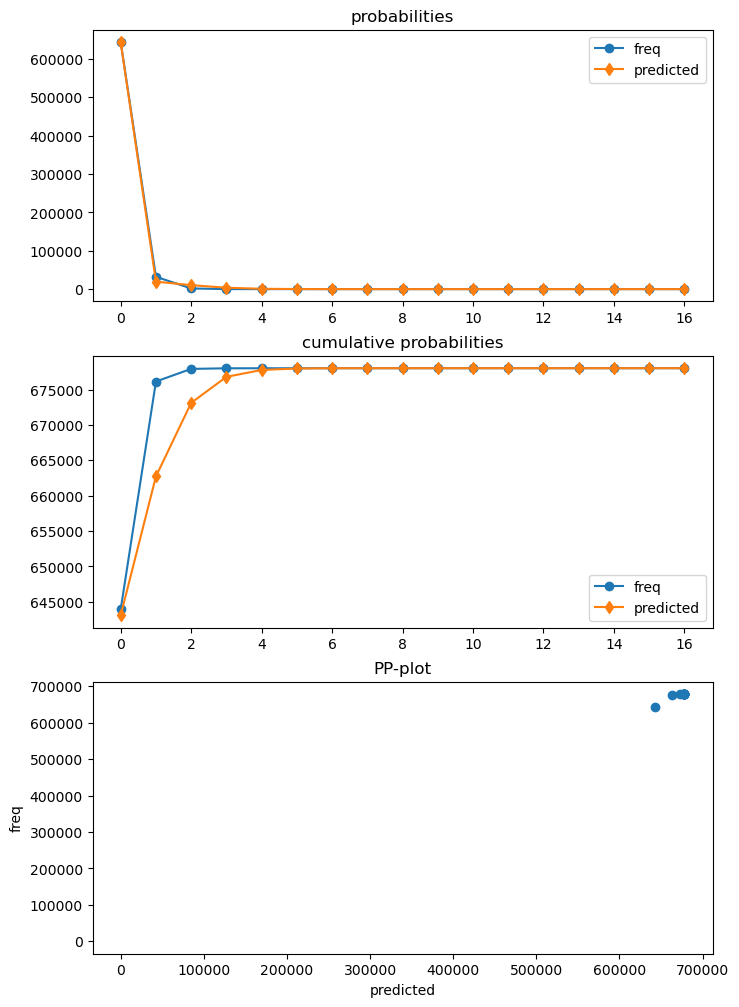

In [16]:
dia_h = res_h.get_diagnostic()
dia_h.plot_probs();